In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
    
np.random.seed(seed=5)

In [2]:
df_m = pd.DataFrame(pd.date_range(start='2009-12-29', end='2019-12-31'), columns = ['Data'])

In [3]:
zbiory=['Australia_S&P_ASX_200.csv','Belgium_BEL_20.csv','Canada_S&P_TSX.csv','Denmark_OMX_Copenhagen_20.csv',
        'Finland_OMX_Helsinki_25.csv','France_CAC_40.csv','Germany_DAX.csv','Hong_Kong_Hang_Seng.csv',
        'Ireland_ISEQ_Overall.csv','Japan_Nikkei_225.csv','Netherlands_AEX.csv','New_Zealand_NZX_50.csv',
        'Norway_Oslo_OBX.csv','Portugal_PSI_20.csv','Spain_IBEX_35.csv','Sweden_OMX_Stockholm_30.csv',
        'Switzerland_SMI.csv','USA_S&P_500.csv','MSCI_World.csv','US3bonds_obligacje.csv']
indeksy = []

#bez Austrii i 'Israel_TA_35.csv'
for zbior in zbiory:
    df = pd.read_csv(zbior)
    x=zbior.split('_')[0]+'_indeks'
    indeksy.append(x)
    
    df["Data"]=pd.to_datetime(df["Data"], format="%d.%m.%Y")
    df = df.sort_values(by="Data")
    
    df['Ostatnio'] = df['Ostatnio'].str.replace('.','')
    df['Ostatnio'] = df['Ostatnio'].str.replace(',','.')
    df["Ostatnio"]=df.Ostatnio.astype(float)
    df[x]=(np.log(df['Ostatnio']).diff()*100).round(2)
    
    df[x] = df[x].replace([np.inf, -np.inf], 0) 
    
    r = pd.date_range(start=df.Data.min(), end=df.Data.max())
    df=df.set_index('Data').reindex(r).rename_axis('Data').reset_index()
    
    df= df.fillna(method='ffill')
    
    df_m = pd.merge(df_m, df[['Data',x]], on="Data")

In [4]:
#sprawdzenie czy ostatni df to jest US3bonds (wazne w nastepnym kroku)
df

,Data,Ostatnio,Otwarcie,Max.,Min.,Zmiana%,US3bonds_indeks
0,2009-12-28,0.0630,"0,0630","0,0630","0,0630","31,25%",NaN
1,2009-12-29,0.1010,"0,1010","0,1010","0,1010","60,32%",47.20
2,2009-12-30,0.0430,"0,0430","0,0430","0,0430","-57,43%",-85.39
3,2009-12-31,0.0610,"0,0610","0,0610","0,0610","41,86%",34.97
4,2010-01-01,0.0610,"0,0610","0,0610","0,0610","41,86%",34.97
...,...,...,...,...,...,...,...
3651,2019-12-27,1.5640,"1,5790","1,6760","1,5590","-0,82%",-0.83
3652,2019-12-28,1.5640,"1,5790","1,6760","1,5590","-0,82%",-0.83
3653,2019-12-29,1.5587,"1,5587","1,5587","1,5587","-0,34%",-0.34
3654,2019-12-30,1.5410,"1,5640","1,6580","1,5410","-1,14%",-1.14


In [5]:
df_m = df_m.drop(df_m[df_m.Data < '2012-12-01'].index)
df['DTB3_dzienne']=(df['Ostatnio']/100+1)**(1/63)-1
df_m = pd.merge(df_m, df[['Data','DTB3_dzienne']], on="Data")
df_m

,Data,Australia_indeks,Belgium_indeks,Canada_indeks,Denmark_indeks,Finland_indeks,France_indeks,Germany_indeks,Hong_indeks,Ireland_indeks,...,New_indeks,Norway_indeks,Portugal_indeks,Spain_indeks,Sweden_indeks,Switzerland_indeks,USA_indeks,MSCI_indeks,US3bonds_indeks,DTB3_dzienne
0,2012-12-01,0.63,-0.60,0.30,0.03,-0.02,-0.33,0.06,0.49,-0.32,...,0.83,0.09,-0.07,-0.49,0.08,-0.12,0.02,0.06,0.12,0.000013
1,2012-12-02,0.63,-0.60,0.30,0.03,-0.02,-0.33,0.06,0.49,-0.32,...,0.83,0.09,-0.07,-0.49,0.08,-0.12,0.02,0.06,0.12,0.000013
2,2012-12-03,0.56,0.14,-0.57,0.62,0.57,0.26,0.40,-1.20,-0.05,...,-0.02,0.03,-0.07,-0.57,0.28,0.27,-0.48,-0.13,16.87,0.000015
3,2012-12-04,-0.62,0.10,-0.27,-0.20,0.18,0.39,-0.00,0.15,-0.14,...,-0.83,-1.22,0.50,0.17,-0.03,0.21,-0.17,0.02,0.00,0.000015
4,2012-12-05,0.37,-0.13,0.17,0.26,1.55,0.28,0.26,2.14,0.49,...,-0.21,-0.05,1.74,-0.24,0.25,-0.02,0.16,0.10,3.08,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,2019-12-26,0.13,0.06,0.30,0.70,0.28,0.00,-0.13,-0.15,0.48,...,0.82,0.76,-0.17,0.02,0.05,0.42,0.51,0.38,-0.32,0.000248
2582,2019-12-27,0.40,0.11,-0.07,0.37,0.17,0.13,0.27,1.29,0.51,...,-0.35,-0.32,0.72,0.40,0.13,0.05,0.00,0.20,-0.83,0.000246
2583,2019-12-28,0.40,0.11,-0.07,0.37,0.17,0.13,0.27,1.29,0.51,...,-0.35,-0.32,0.72,0.40,0.13,0.05,0.00,0.20,-0.83,0.000246
2584,2019-12-29,0.40,0.11,-0.07,0.37,0.17,0.13,0.27,1.29,0.51,...,0.11,-0.32,0.72,0.40,0.13,0.05,0.00,0.20,-0.34,0.000246


In [ ]:
# tu sa dane potrzebne do Staty, ale juz nie trzeba tego uruchamiać bo dane są zapisane w pliku, który jest importowany poniżej
# obliczenia przedstawione w tej komórce mogą trwać kilkanaście minut
df_c=df_m.copy()
df_c=df_c.set_index('Data')

indeksy.remove('US3bonds_indeks')
indeksy.remove('MSCI_indeks')

df_c['u_m']=df_c['MSCI_indeks'].mean()

df_c['l2_capm']=df_c['MSCI_indeks']-df_c['DTB3_dzienne']
df_c['l2_hw']=np.minimum(df_c['l2_capm'],0)
df_c['l2_hr']=np.minimum(df_c['MSCI_indeks']-df_c['u_m'],0)

df_c['var_capm']=df_c.rolling(30).var().unstack()['l2_capm']
df_c['var_hw']=df_c.rolling(30).var().unstack()['l2_hw']
df_c['var_hr']=df_c.rolling(30).var().unstack()['l2_hr']


for indeks in indeksy:
    kraj = indeks.split('_')[0]
    #l1- pierwszy skladnik licznika
    df_c[kraj+'l1']=df_c[indeks]-df_c['DTB3_dzienne']
    
    df_c['cov_capm']=df_c.rolling(30).cov().unstack()[kraj+'l1']['l2_capm']
    df_c[kraj+'_bCAPM']=df_c['cov_capm']/df_c['var_capm']
    
    df_c['cov_hw']=df_c.rolling(30).cov().unstack()[kraj+'l1']['l2_hw']
    df_c[kraj+'_bHW']=df_c['cov_hw']/df_c['var_hw']
    
    
    df_c['u_i']=df_c[indeks].mean()
    df_c[kraj+'l1_hr']=df_c[indeks]-df_c['u_i']
    df_c['cov_hr']=df_c.rolling(30).cov().unstack()[kraj+'l1']['l2_hr']
    df_c[kraj+'_bHR']=df_c['cov_hr']/df_c['var_hr']  
    
    df_c[kraj+'l1_e']=np.minimum(df_c[kraj+'l1_hr'],0)
    df_c['cov_e']=df_c.rolling(30).cov().unstack()[kraj+'l1_e']['l2_hr']
    df_c[kraj+'_bE']=df_c['cov_e']/df_c['var_hr']  
    
    df_c = df_c.drop(indeks, 1)
    
df_c=df_c.drop(['MSCI_indeks','US3bonds_indeks','DTB3_dzienne','u_i','u_m','cov_capm','cov_hw','cov_hr','cov_e','var_capm','var_hw','var_hr'],1)

In [6]:
#Z powodu braku odpowiedniej biblioteki do obliczenia DCC GARCH(1,1) w pythonie to obliczenia te zostaną wykonane w STATA

#Plik, który będzie wykorzystany w stacie. 
#df_c.to_csv(r'D:\studia\V rok\MRF\projekt\dane_indeksy.csv', index=True, header=True)

#df_c = pd.read_csv(r'D:\studia\V rok\MRF\projekt\dane_indeksy.csv')
df_c = pd.read_csv('dane_indeksy.csv')

In [7]:
df_m_stat=df_m.drop(df_m[df_m.Data<'2013-01-01'].index)
df_m_stat=df_m_stat.drop(['Data','US3bonds_indeks','DTB3_dzienne'],1)
df_m_stat

,Australia_indeks,Belgium_indeks,Canada_indeks,Denmark_indeks,Finland_indeks,France_indeks,Germany_indeks,Hong_indeks,Ireland_indeks,Japan_indeks,Netherlands_indeks,New_indeks,Norway_indeks,Portugal_indeks,Spain_indeks,Sweden_indeks,Switzerland_indeks,USA_indeks,MSCI_indeks
31,-0.48,0.39,0.95,-0.36,-0.95,0.57,-0.57,-0.04,0.90,0.70,0.21,-0.35,-0.89,-0.08,0.45,-0.56,-0.59,1.68,0.00
32,1.22,1.58,0.86,2.05,3.82,2.52,2.16,2.85,1.74,0.70,2.16,-0.35,2.33,2.74,3.37,2.26,-0.59,2.51,2.13
33,0.74,0.06,-0.56,0.39,0.81,-0.34,-0.29,0.37,0.64,0.70,0.15,0.39,0.23,0.95,-0.52,0.04,2.86,-0.21,-0.22
34,-0.36,-0.02,0.56,0.92,0.55,0.24,0.26,-0.29,0.55,2.78,0.28,-0.18,0.36,0.19,0.38,0.56,0.55,0.49,0.42
35,-0.36,-0.02,0.56,0.92,0.55,0.24,0.26,-0.29,0.55,2.78,0.28,-0.18,0.36,0.19,0.38,0.56,0.55,0.49,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.13,0.06,0.30,0.70,0.28,0.00,-0.13,-0.15,0.48,0.60,0.02,0.82,0.76,-0.17,0.02,0.05,0.42,0.51,0.38
2582,0.40,0.11,-0.07,0.37,0.17,0.13,0.27,1.29,0.51,-0.37,0.28,-0.35,-0.32,0.72,0.40,0.13,0.05,0.00,0.20
2583,0.40,0.11,-0.07,0.37,0.17,0.13,0.27,1.29,0.51,-0.37,0.28,-0.35,-0.32,0.72,0.40,0.13,0.05,0.00,0.20
2584,0.40,0.11,-0.07,0.37,0.17,0.13,0.27,1.29,0.51,-0.37,0.28,0.11,-0.32,0.72,0.40,0.13,0.05,0.00,0.20


In [8]:
df_m_stat.columns = df_m_stat.columns.str.replace(r'_indeks', '')
df_m_stat.rename(columns={'Hong': 'Hong Kong', 'New': 'New Zealand' , 'MSCI': 'World market'}, inplace=True)
df_m_stat=df_m_stat.describe().loc[['mean','min','50%','max','std']].round(3)
df_m_stat.loc['skew'] = df_m_stat.skew().round(3).tolist()
df_m_stat.loc['kurt'] = df_m_stat.kurtosis().round(3).tolist()
df_m_stat = df_m_stat.transpose()
df_m_stat

#df_m_stat.to_excel(r'D:\studia\V rok\MRF\projekt\df_m_stat.xlsx', index=True, header=True)

,mean,min,50%,max,std,skew,kurt
Australia,0.020,-4.18,0.05,3.28,0.758,-0.778,1.986
Belgium,0.029,-6.61,0.06,3.80,0.935,-1.273,2.449
Canada,0.022,-3.17,0.07,2.90,0.657,-0.513,1.941
Denmark,0.057,-6.78,0.09,5.14,1.061,-0.823,2.347
Finland,0.042,-8.75,0.06,3.82,1.022,-1.607,3.073
France,0.029,-8.38,0.07,4.06,1.070,-1.494,2.885
Germany,0.030,-7.07,0.09,4.85,1.094,-1.000,2.405
Hong Kong,0.032,-6.02,0.08,4.13,1.034,-1.021,2.236
Ireland,0.057,-10.42,0.06,4.45,1.032,-1.618,3.342
Japan,0.043,-8.25,0.08,7.43,1.304,-0.465,2.345


In [9]:
#zbiór po wyliczeniu bet dla DCC w stacie
df_i = pd.read_csv("D:\studia\V rok\MRF\projekt\indeksy_DCC_B.csv")
df_i = df_i.drop(df_i[df_i.data < '2013-01-01'].index)
df_i['data'] = pd.to_datetime(df_i['data'])
df_i = df_i.set_index('data')
df_i

,australia_bcapm,australia_bhw,australia_bhr,australia_be,belgium_bcapm,belgium_bhw,belgium_bhr,belgium_be,canada_bcapm,canada_bhw,...,sweden_DCC_HR,sweden_DCC_E,switzerland_DCC_CAPM,switzerland_DCC_HW,switzerland_DCC_HR,switzerland_DCC_E,USA_DCC_CAPM,USA_DCC_HW,USA_DCC_HR,USA_DCC_E
data,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.024053,0.159339,0.164352,0.014501,0.539742,0.934921,0.889239,0.567620,0.460788,0.634949,...,0.807605,0.714534,0.433084,0.950771,0.929820,0.649579,1.525187,2.360689,2.312594,1.307739
2013-01-02,0.216677,0.224782,0.231999,0.019995,0.613526,1.034857,0.988555,0.570897,0.415298,0.701567,...,0.852276,0.757392,0.571436,0.969883,0.969087,0.735658,1.771459,2.841797,2.801635,1.292598
2013-01-03,0.203809,0.288615,0.289531,0.059088,0.610596,1.048670,1.000973,0.561156,0.427363,0.745833,...,1.416872,0.837760,-0.012025,0.958130,0.937127,0.763300,1.112134,3.767214,3.702206,1.268293
2013-01-04,0.179193,0.231687,0.232831,0.029359,0.600375,1.057248,1.009517,0.569699,0.437448,0.776247,...,1.442956,0.846734,0.026422,1.478704,1.357351,0.685347,1.141457,3.125335,3.068799,1.244824
2013-01-05,0.168139,0.223109,0.224287,0.020815,0.614009,1.128214,1.080199,0.640381,0.452808,0.823818,...,1.424858,0.872020,0.236300,1.389269,1.316618,0.660607,1.160247,2.473856,2.428079,1.218217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.583661,1.404479,1.329675,0.814119,1.036382,1.683009,1.615718,0.983452,0.763381,1.399133,...,0.947803,0.915671,0.906088,1.080822,1.073458,0.778323,1.084199,1.118427,1.117341,1.059389
2019-12-27,0.558780,1.354695,1.280125,0.814119,1.039897,1.673616,1.606369,0.983452,0.757555,1.356863,...,0.889423,0.903682,0.918213,1.056435,1.044138,0.767456,1.107186,1.239236,1.223291,1.063700
2019-12-28,0.573560,1.371827,1.297609,0.821123,1.045048,1.664819,1.591347,0.981740,0.762602,1.334086,...,0.869435,0.900940,0.866705,0.938138,0.922014,0.763838,1.059858,1.146929,1.126730,1.049775


In [10]:
df_i_T=df_i.reset_index()
df_i_T=df_i_T.drop(['data'],1)
df_i_T=df_i_T.transpose()
df_i_T['mean']=df_i_T.mean(numeric_only=True, axis=1).round(3)
df_i_T=df_i_T['mean'].reset_index()
df_i_T['index']=df_i_T['index'].str.capitalize()
df_i_T[['Country','Beta']]=df_i_T['index'].str.split('_',1, expand=True)
df_i_T['Beta']=df_i_T['Beta'].str.upper()
df_i_T.Country.replace(['Hong', 'New'], ['Hong Kong', 'New Zealand'], inplace=True)
df_i_T=df_i_T.drop(['index'],1)

df_i_stat = pd.pivot_table(df_i_T, values='mean', index=['Country'],
                    columns=['Beta'], aggfunc=np.sum)

#df_i_stat.to_excel(r'D:\studia\V rok\MRF\projekt\df_i_stat.xlsx', index=True, header=True)

df_i_stat

Beta,BCAPM,BE,BHR,BHW,DCC_CAPM,DCC_E,DCC_HR,DCC_HW
Country,,,,,,,,
Australia,0.333,0.326,0.532,0.550,0.397,0.416,0.558,0.570
Belgium,0.972,0.892,1.468,1.503,0.999,0.966,1.349,1.371
Canada,0.680,0.658,1.059,1.087,0.707,0.687,0.951,0.965
Denmark,0.761,0.687,1.202,1.234,0.835,0.766,1.131,1.151
Finland,1.009,0.895,1.516,1.550,1.012,0.879,1.285,1.301
France,1.156,1.069,1.734,1.772,1.162,1.137,1.579,1.606
Germany,1.156,1.044,1.708,1.746,1.177,1.126,1.582,1.610
Hong Kong,0.559,0.500,0.891,0.916,0.674,0.600,0.890,0.902
Ireland,0.902,0.760,1.297,1.325,0.949,0.893,1.273,1.294


In [11]:
df_i.describe()

,australia_bcapm,australia_bhw,australia_bhr,australia_be,belgium_bcapm,belgium_bhw,belgium_bhr,belgium_be,canada_bcapm,canada_bhw,...,sweden_DCC_HR,sweden_DCC_E,switzerland_DCC_CAPM,switzerland_DCC_HW,switzerland_DCC_HR,switzerland_DCC_E,USA_DCC_CAPM,USA_DCC_HW,USA_DCC_HR,USA_DCC_E
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,...,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000
mean,0.332878,0.549776,0.531901,0.326254,0.971804,1.503226,1.467845,0.892034,0.679743,1.086530,...,1.236656,0.858512,0.819343,1.117985,1.101713,0.757493,1.068647,1.471973,1.449530,1.079996
std,0.336643,0.751813,0.702265,0.436158,0.330689,0.668576,0.635913,0.433462,0.223719,0.487323,...,0.421412,0.190092,0.269472,0.396490,0.390013,0.318637,0.173893,0.422857,0.414906,0.159000
min,-0.905028,-2.262010,-2.016806,-0.679784,0.121417,0.069956,0.094120,-0.338512,-0.013419,-0.594900,...,0.005191,-0.014219,-0.012025,0.153503,0.156591,0.094835,0.358056,0.569078,0.573859,0.519384
25%,0.119596,0.107378,0.110246,0.029540,0.754595,1.047584,1.031501,0.588689,0.542684,0.805284,...,0.988070,0.802359,0.650794,0.902483,0.890228,0.629894,0.967238,1.208899,1.192343,1.001189
50%,0.322946,0.438222,0.433304,0.242639,0.995109,1.487044,1.456179,0.882704,0.653115,0.997009,...,1.168244,0.875949,0.794807,1.031932,1.016072,0.708987,1.059923,1.355992,1.335087,1.064093
75%,0.548054,0.892201,0.877829,0.577507,1.207837,1.862553,1.828366,1.168729,0.797430,1.285351,...,1.404639,0.901721,0.961329,1.245182,1.228516,0.786388,1.152908,1.600319,1.576995,1.153250
max,1.524138,5.828272,4.994980,2.977938,2.079413,4.749045,4.276508,2.942104,1.741152,4.127952,...,4.122173,2.380777,2.606160,4.283289,4.117287,5.031259,1.956318,5.486392,5.372949,1.937483


In [12]:
df_c

,Data,l2_capm,l2_hw,l2_hr,Australial1,Australia_bCAPM,Australia_bHW,Australial1_hr,Australia_bHR,Australial1_e,...,Switzerland_bHR,Switzerlandl1_e,Switzerland_bE,USAl1,USA_bCAPM,USA_bHW,USAl1_hr,USA_bHR,USAl1_e,USA_bE
0,2012-12-01,0.059987,0.000000,0.000000,0.629987,NaN,NaN,0.607243,NaN,0.000000,...,NaN,-0.146582,NaN,0.019987,NaN,NaN,-0.029443,NaN,-0.029443,NaN
1,2012-12-02,0.059987,0.000000,0.000000,0.629987,NaN,NaN,0.607243,NaN,0.000000,...,NaN,-0.146582,NaN,0.019987,NaN,NaN,-0.029443,NaN,-0.029443,NaN
2,2012-12-03,-0.130015,-0.130015,-0.160584,0.559985,NaN,NaN,0.537243,NaN,0.000000,...,NaN,0.000000,NaN,-0.480015,NaN,NaN,-0.529443,NaN,-0.529443,NaN
3,2012-12-04,0.019985,0.000000,-0.010584,-0.620015,NaN,NaN,-0.642757,NaN,-0.642757,...,NaN,0.000000,NaN,-0.170015,NaN,NaN,-0.219443,NaN,-0.219443,NaN
4,2012-12-05,0.099984,0.000000,0.000000,0.369984,NaN,NaN,0.347243,NaN,0.000000,...,NaN,-0.046582,NaN,0.159984,NaN,NaN,0.110557,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,2019-12-26,0.379752,0.000000,0.000000,0.129752,0.583661,1.404479,0.107243,1.329675,0.000000,...,2.399924,0.000000,1.458924,0.509752,1.039466,1.940237,0.460557,1.861753,0.000000,1.142987
2582,2019-12-27,0.199754,0.000000,0.000000,0.399754,0.558780,1.354695,0.377243,1.280125,0.000000,...,2.384966,0.000000,1.458924,-0.000246,1.036050,1.900786,-0.049443,1.822486,-0.049443,1.138364
2583,2019-12-28,0.199754,0.000000,0.000000,0.399754,0.573560,1.371827,0.377243,1.297609,0.000000,...,2.356974,0.000000,1.456914,-0.000246,1.055466,1.859912,-0.049443,1.782659,-0.049443,1.131355
2584,2019-12-29,0.199754,0.000000,0.000000,0.399754,0.580961,1.438777,0.377243,1.362761,0.000000,...,2.395142,0.000000,1.546213,-0.000246,1.063793,1.836410,-0.049443,1.762044,-0.049443,1.145059


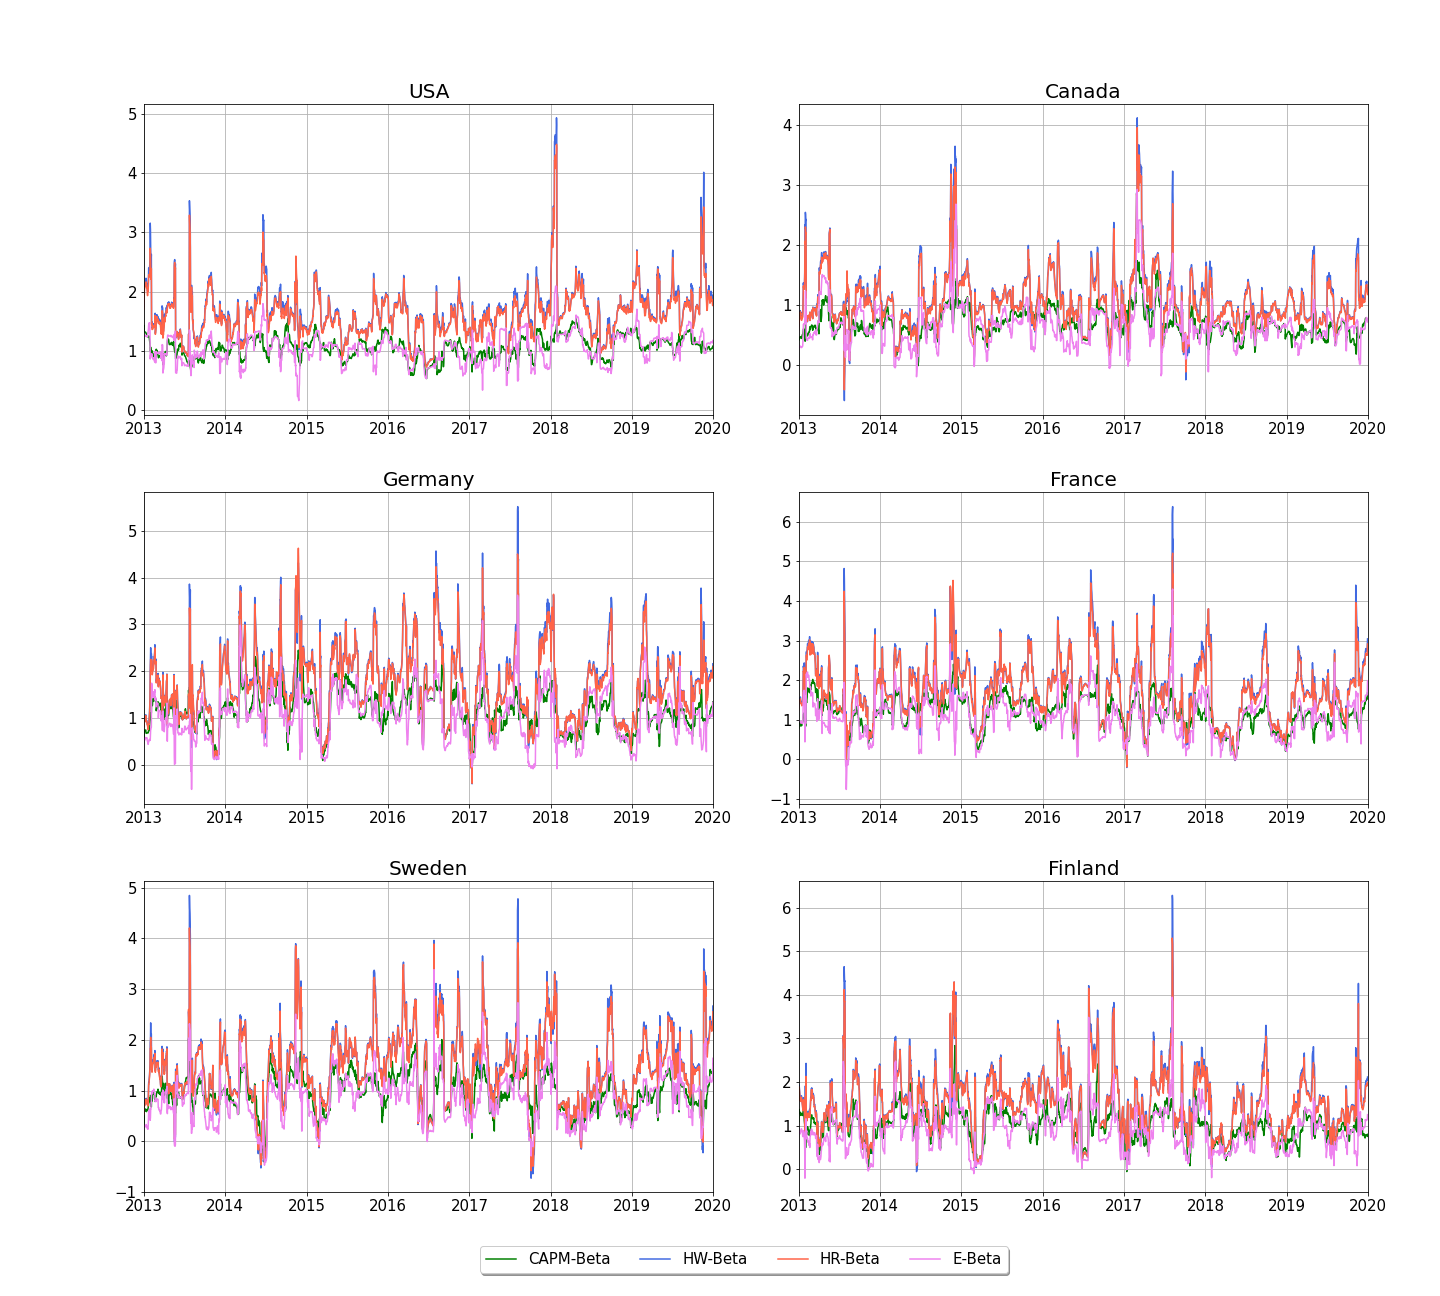

In [13]:
plt.rcParams["figure.figsize"] = (20,18)
plt.figure()
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['savefig.facecolor']='white'

s=321
for kraj in ['USA','Canada','Germany','France',"Sweden",'Finland']:
    plt.subplot(s)
    plt.plot(df_c[kraj+'_bCAPM'], color='green', linewidth=1.5, label='CAPM-Beta')
    plt.plot(df_c[kraj+'_bHW'], color='royalblue', linewidth=1.5, label='HW-Beta')
    plt.plot(df_c[kraj+'_bHR'], color='tomato', linewidth=1.5, label='HR-Beta')
    plt.plot(df_c[kraj+'_bE'], color='violet', linewidth=1.5, label='E-Beta')
    plt.title(kraj, size=20)
    plt.xlim([datetime.date(2013, 1, 1), datetime.date(2020, 1, 1)])
    plt.grid(True)
    s=s+1

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.15)
plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(0.38, -0.15),
          fancybox=True, shadow=True, fontsize=15)

#plt.savefig(r'D:\studia\V rok\MRF\projekt\Wykresy\Bety.png',transparent=False)
plt.show()

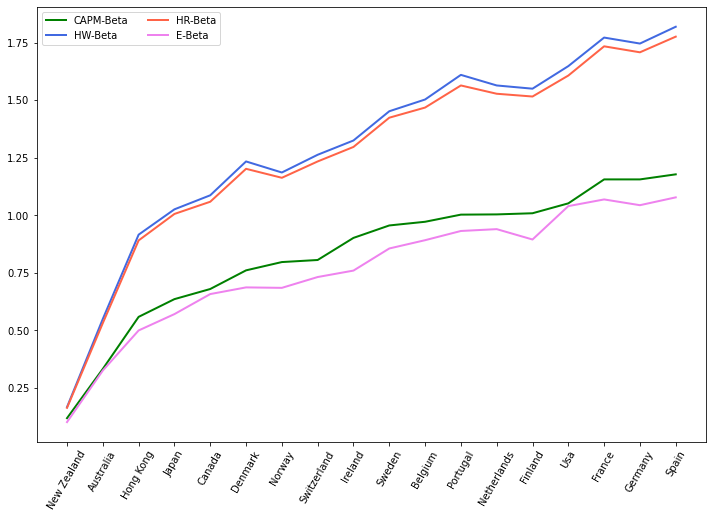

In [14]:
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=60)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

df_i_stat_plot = df_i_stat.iloc[:, 0:4] 
df_i_stat_plot=df_i_stat_plot.sort_values(by='BCAPM', ascending=True)

plt.plot(df_i_stat_plot['BCAPM'], label='CAPM-Beta', linewidth=2, color='green')
plt.plot(df_i_stat_plot['BHW'], label='HW-Beta', linewidth=2, color='royalblue')
plt.plot(df_i_stat_plot['BHR'], label='HR-Beta', linewidth=2, color='tomato')
plt.plot(df_i_stat_plot['BE'], label='E-Beta', linewidth=2, color='violet')
plt.legend(ncol=2, loc='upper left')

#plt.savefig(r'D:\studia\V rok\MRF\projekt\Wykresy\Bety_linie.png',transparent=False)

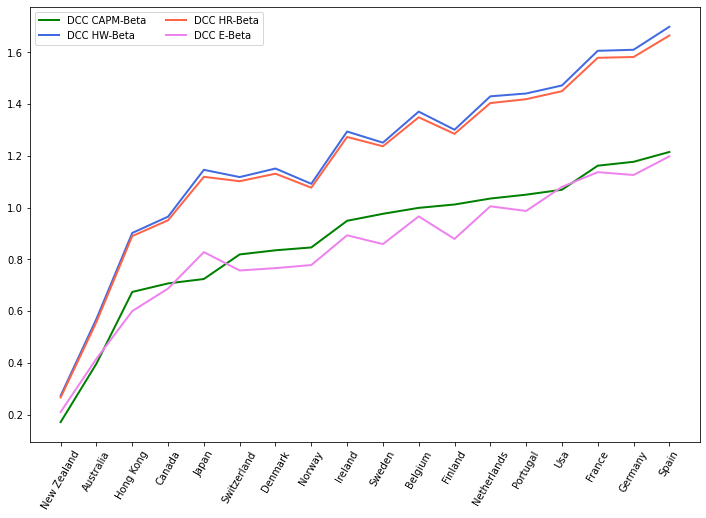

In [15]:
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(rotation=60)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

df_i_stat_plot = df_i_stat.iloc[:, 4:8] 
df_i_stat_plot=df_i_stat_plot.sort_values(by='DCC_CAPM', ascending=True)

plt.plot(df_i_stat_plot['DCC_CAPM'], label='DCC CAPM-Beta', linewidth=2, color='green')
plt.plot(df_i_stat_plot['DCC_HW'], label='DCC HW-Beta', linewidth=2, color='royalblue')
plt.plot(df_i_stat_plot['DCC_HR'], label='DCC HR-Beta', linewidth=2, color='tomato')
plt.plot(df_i_stat_plot['DCC_E'], label='DCC E-Beta', linewidth=2, color='violet')
plt.legend(ncol=2, loc='upper left')

plt.savefig(r'D:\studia\V rok\MRF\projekt\Wykresy\DCC_linie.png',transparent=False)

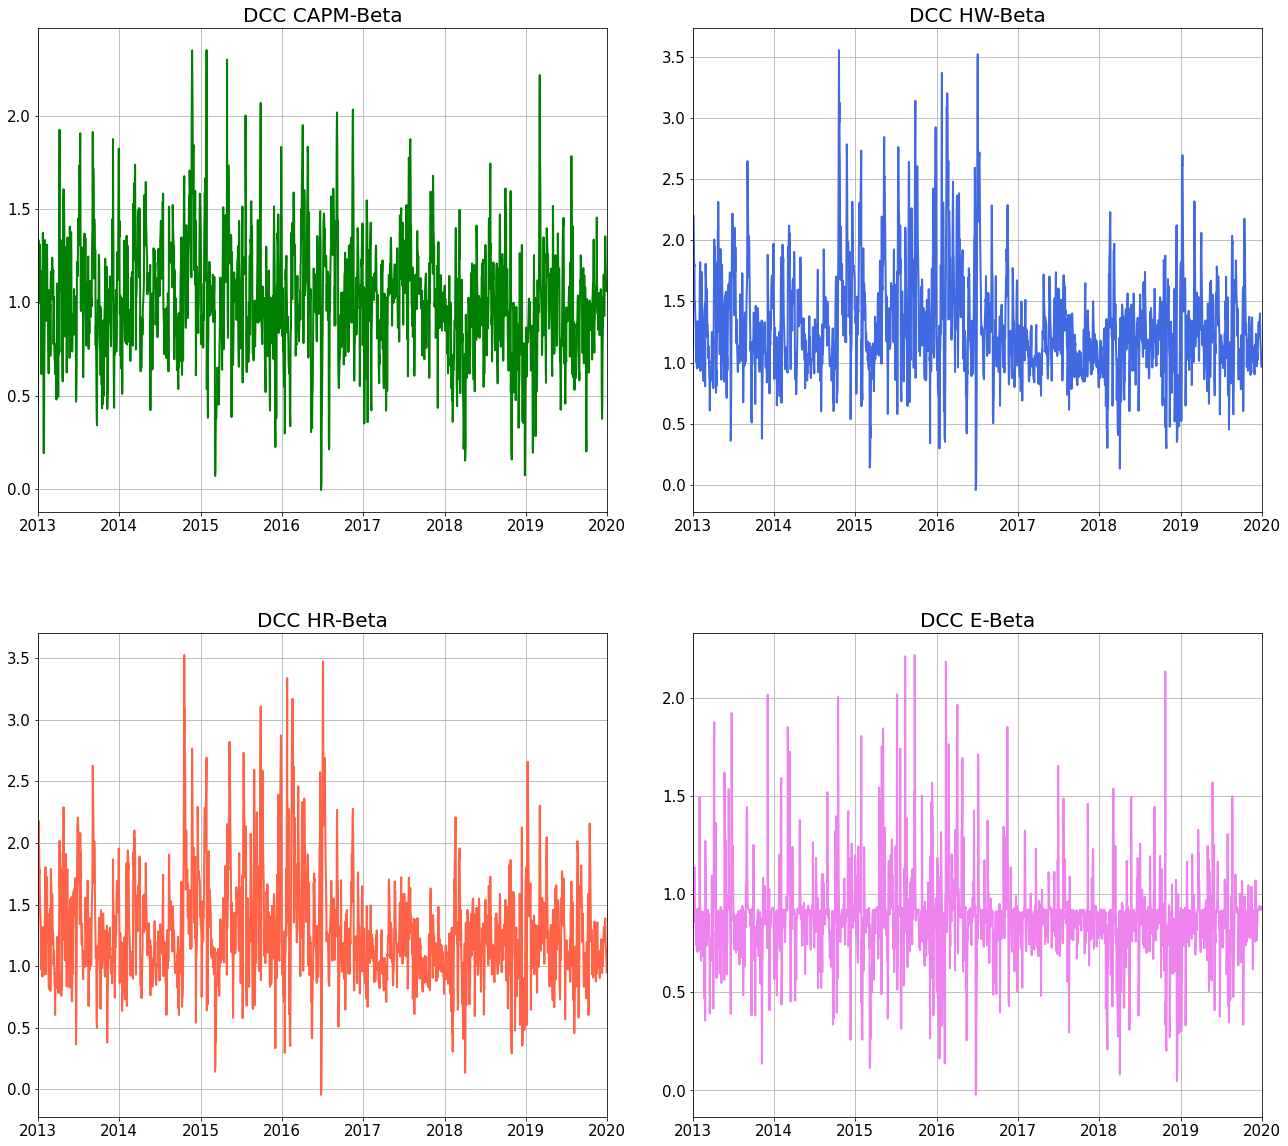

In [16]:
#te wykresy i boxplot ponizej działa na tej samej zmiennej kraj 
#czasem trzeba puscic 2 razy boxplot aby rozmiar czcionek się dostosował

plt.rcParams["figure.figsize"] = (20,18)
plt.figure()
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

kraj='finland'

plt.subplot(221)
plt.plot(df_i[kraj+'_DCC_CAPM'], label='DCC CAPM-Beta', linewidth=2, color='green')
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2020, 1, 1)])
plt.title('DCC CAPM-Beta', size=20)
plt.grid(True)

plt.subplot(222)
plt.plot(df_i[kraj+'_DCC_HW'], label='DCC HW-Beta', linewidth=2, color='royalblue')
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2020, 1, 1)])
plt.title('DCC HW-Beta', size=20)
plt.grid(True)

plt.subplot(223)
plt.plot(df_i[kraj+'_DCC_HR'], label='DCC HR-Beta', linewidth=2, color='tomato')
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2020, 1, 1)])
plt.title('DCC HR-Beta', size=20)
plt.grid(True)

plt.subplot(224)
plt.plot(df_i[kraj+'_DCC_E'], label='DCC E-Beta', linewidth=2, color='violet')
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2020, 1, 1)])
plt.title('DCC E-Beta', size=20)
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.15)
#plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(0.38, -0.15),
#          fancybox=True, shadow=True, fontsize=15)

#plt.savefig(r'D:\studia\V rok\MRF\projekt\Wykresy' + '\\'+ kraj+'_DCC_wykresy.png',transparent=False)



[Text(1, 0, 'DCC CAPM-Beta'),
 Text(2, 0, 'DCC HW-Beta'),
 Text(3, 0, 'DCC HR-Beta'),
 Text(4, 0, 'DCC E-Beta')]

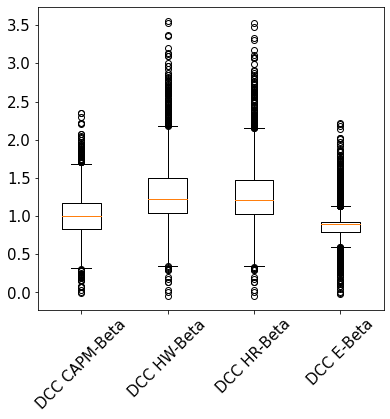

In [17]:
#czasem trzeba puscic 2 razy aby sie rozmiar czcionki zmienil, bo inaczej to przy zapisie pliku ucina nazwy
fig = plt.figure(figsize =(6, 6))
# Creating axes instance
ax = fig.add_axes([0.1, 0.2, 0.8, 0.7])
 
# Creating plot
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=12)
plt.rcParams['savefig.facecolor']='white' 
bp = ax.boxplot([df_i[kraj+'_DCC_CAPM'],df_i[kraj+'_DCC_HW'], df_i[kraj+'_DCC_HR'], df_i[kraj+'_DCC_E']])
ax.set_xticklabels(['DCC CAPM-Beta', 'DCC HW-Beta','DCC HR-Beta', 'DCC E-Beta'])

#plt.savefig(r'D:\studia\V rok\MRF\projekt\Wykresy' + '\\'+ kraj+'_DCC_box.png',transparent=False)

In [18]:
df_m_stat.describe().loc[['min','max']]

,mean,min,50%,max,std,skew,kurt
min,-0.004,-13.19,0.01,2.41,0.535,-1.924,1.614
max,0.057,-3.17,0.09,7.43,1.304,0.017,4.153


In [19]:
df_i_stat.describe().loc[['min','max','mean']]

Beta,BCAPM,BE,BHR,BHW,DCC_CAPM,DCC_E,DCC_HR,DCC_HW
min,0.119000,0.102000,0.164000,0.167,0.171000,0.210000,0.266000,0.273000
max,1.178000,1.078000,1.776000,1.819,1.215000,1.198000,1.665000,1.699000
mean,0.837722,0.764833,1.270722,1.301,0.878722,0.842889,1.185389,1.205111


In [20]:
pd.options.display.max_columns = None
df_model = pd.merge(df_m, df_i, left_on='Data', right_on='data')
df_model.columns = df_model.columns.str.capitalize()
df_model

,Data,Australia_indeks,Belgium_indeks,Canada_indeks,Denmark_indeks,Finland_indeks,France_indeks,Germany_indeks,Hong_indeks,Ireland_indeks,Japan_indeks,Netherlands_indeks,New_indeks,Norway_indeks,Portugal_indeks,Spain_indeks,Sweden_indeks,Switzerland_indeks,Usa_indeks,Msci_indeks,Us3bonds_indeks,Dtb3_dzienne,Australia_bcapm,Australia_bhw,Australia_bhr,Australia_be,Belgium_bcapm,Belgium_bhw,Belgium_bhr,Belgium_be,Canada_bcapm,Canada_bhw,Canada_bhr,Canada_be,Denmark_bcapm,Denmark_bhw,Denmark_bhr,Denmark_be,Finland_bcapm,Finland_bhw,Finland_bhr,Finland_be,France_bcapm,France_bhw,France_bhr,France_be,Germany_bcapm,Germany_bhw,Germany_bhr,Germany_be,Hong_bcapm,Hong_bhw,Hong_bhr,Hong_be,Ireland_bcapm,Ireland_bhw,Ireland_bhr,Ireland_be,Japan_bcapm,Japan_bhw,Japan_bhr,Japan_be,Netherlands_bcapm,Netherlands_bhw,Netherlands_bhr,Netherlands_be,New_bcapm,New_bhw,New_bhr,New_be,Norway_bcapm,Norway_bhw,Norway_bhr,Norway_be,Portugal_bcapm,Portugal_bhw,Portugal_bhr,Portugal_be,Spain_bcapm,Spain_bhw,Spain_bhr,Spain_be,Sweden_bcapm,Sweden_bhw,Sweden_bhr,Sweden_be,Switzerland_bcapm,Switzerland_bhw,Switzerland_bhr,Switzerland_be,Usa_bcapm,Usa_bhw,Usa_bhr,Usa_be,Australia_dcc_capm,Australia_dcc_hw,Australia_dcc_hr,Australia_dcc_e,Belgium_dcc_capm,Belgium_dcc_hw,Belgium_dcc_hr,Belgium_dcc_e,Canada_dcc_capm,Canada_dcc_hw,Canada_dcc_hr,Canada_dcc_e,Denmark_dcc_capm,Denmark_dcc_hw,Denmark_dcc_hr,Denmark_dcc_e,Finland_dcc_capm,Finland_dcc_hw,Finland_dcc_hr,Finland_dcc_e,France_dcc_capm,France_dcc_hw,France_dcc_hr,France_dcc_e,Germany_dcc_capm,Germany_dcc_hw,Germany_dcc_hr,Germany_dcc_e,Hong_dcc_capm,Hong_dcc_hw,Hong_dcc_hr,Hong_dcc_e,Ireland_dcc_capm,Ireland_dcc_hw,Ireland_dcc_hr,Ireland_dcc_e,Japan_dcc_capm,Japan_dcc_hw,Japan_dcc_hr,Japan_dcc_e,Netherlands_dcc_capm,Netherlands_dcc_hw,Netherlands_dcc_hr,Netherlands_dcc_e,New_dcc_capm,New_dcc_hw,New_dcc_hr,New_dcc_e,Norway_dcc_capm,Norway_dcc_hw,Norway_dcc_hr,Norway_dcc_e,Portugal_dcc_capm,Portugal_dcc_hw,Portugal_dcc_hr,Portugal_dcc_e,Spain_dcc_capm,Spain_dcc_hw,Spain_dcc_hr,Spain_dcc_e,Sweden_dcc_capm,Sweden_dcc_hw,Sweden_dcc_hr,Sweden_dcc_e,Switzerland_dcc_capm,Switzerland_dcc_hw,Switzerland_dcc_hr,Switzerland_dcc_e,Usa_dcc_capm,Usa_dcc_hw,Usa_dcc_hr,Usa_dcc_e
0,2013-01-01,-0.48,0.39,0.95,-0.36,-0.95,0.57,-0.57,-0.04,0.90,0.70,0.21,-0.35,-0.89,-0.08,0.45,-0.56,-0.59,1.68,0.00,0.00,0.000007,0.024053,0.159339,0.164352,0.014501,0.539742,0.934921,0.889239,0.567620,0.460788,0.634949,0.618829,0.275063,-0.056995,0.180780,0.173794,0.064652,1.081566,1.669131,1.632053,0.853538,0.781088,1.357235,1.307469,0.962392,0.534176,0.843552,0.818960,0.535085,0.193170,0.631246,0.607359,0.343143,0.556615,0.800539,0.782633,0.280802,0.464757,0.748250,0.720581,0.516033,0.634306,1.312454,1.262007,0.953289,0.109178,0.281795,0.279326,0.140116,0.130479,0.188196,0.194457,0.157659,1.021235,1.784680,1.728655,1.005038,0.906502,1.093986,1.055847,0.778639,0.293627,0.543643,0.523893,0.299114,0.373407,0.653807,0.643235,0.422761,1.428470,1.875571,1.818302,1.245302,0.065500,0.234851,0.222378,0.201595,0.818484,1.214470,1.194729,0.886132,0.686952,0.985217,0.966069,0.596064,0.376585,0.731378,0.716162,0.407301,0.459811,1.116746,1.091546,0.889046,1.227105,1.801656,1.769211,1.466044,0.610559,1.063719,1.040625,0.762012,0.307910,0.565903,0.553630,0.387526,0.796113,1.134545,1.116465,0.731867,0.526656,0.684288,0.670096,0.486399,0.762940,1.116919,1.099928,0.890444,-0.029470,0.128544,0.118402,0.111520,0.393884,0.925058,0.908862,0.780009,0.700944,1.092786,1.070949,0.842489,1.257054,1.859373,1.827625,1.554874,0.375643,0.825975,0.807605,0.714534,0.433084,0.950771,0.929820,0.649579,1.525187,2.360689,2.312594,1.307739
1,2013-01-02,1.22,1.58,0.86,2.05,3.82,2.52,2.16,2.85,1.74,0.70,2.16,-0.35,2.33,2.74,3.37,2.26,-0.59,2.51,2.13,50.21,0.000012,0.216677,0.224782,0.231999,0.019995,0.613526,1.034857,0.988555,0.570897,0.415298,0.701567,0.679560,0.288064,0.353664,0.312107,0.308602,0.072829,1.374661,1.917435,1.881297,0.865350,0.946533,1.520938,1.470877,0.960080,0.74

In [21]:
kraje=df_i_stat.index
columns = ['Country']
columns = columns + df_i_stat.columns.values.tolist()
df_ols = pd.DataFrame(columns= columns)
df_ols['Country']=kraje

kraje_loop = kraje.tolist()
kraje_loop[7] = 'Hong'
kraje_loop[11] = 'New'


for i in range(len(kraje_loop)):
    filter_col = [col for col in df_model if col.startswith(kraje_loop[i])]
    Y = df_model[filter_col[0]]
    X = df_model[filter_col[1:]]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    p_values=results.pvalues.round(3).tolist()
    df_ols.iloc[i,1:]=p_values[1:]

df_ols_p = df_ols
#df_ols.to_excel(r'D:\studia\V rok\MRF\projekt\df_ols_pvalues.xlsx', index=None, header=True)

In [22]:
kraje=df_i_stat.index
columns = ['Country']
columns = columns + df_i_stat.columns.values.tolist()
df_ols = pd.DataFrame(columns= columns)
df_ols['Country']=kraje

kraje_loop = kraje.tolist()
kraje_loop[7] = 'Hong'
kraje_loop[11] = 'New'


for i in range(len(kraje_loop)):
    filter_col = [col for col in df_model if col.startswith(kraje_loop[i])]
    Y = df_model[filter_col[0]]
    X = df_model[filter_col[1:]]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    p_values=results.params.round(3).tolist()
    df_ols.iloc[i,1:]=p_values[1:]

df_ols
#df_ols.to_excel(r'D:\studia\V rok\MRF\projekt\df_ols_params.xlsx', index=None, header=True)

,Country,BCAPM,BE,BHR,BHW,DCC_CAPM,DCC_E,DCC_HR,DCC_HW
0,Australia,0.037,0.901,-0.945,-0.127,-0.819,-1.962,3.38,-1.071
1,Belgium,-0.185,-0.137,0.586,-0.484,-0.16,3.775,-3.174,-0.546
2,Canada,-0.254,-0.578,1.003,-0.424,-0.292,1.336,-0.81,-0.367
3,Denmark,-0.143,0.219,-0.038,-0.238,-0.109,-1.468,2.26,-1.031
4,Finland,-0.168,0.055,0.355,-0.619,-0.321,0.663,0.029,-0.087
5,France,-0.339,-0.017,0.616,-0.611,-0.04,-4.306,4.444,0.043
6,Germany,-0.37,-0.388,0.881,-0.504,0.122,-3.025,3.313,-0.426
7,Hong Kong,0.015,0.093,0.012,-0.294,-0.494,5.22,-3.973,-0.59
8,Ireland,-0.282,-1.274,1.771,-0.412,-0.428,3.251,-2.592,-0.495
9,Japan,-0.139,-0.037,0.181,-0.195,-0.45,0.061,0.747,-0.563


In [23]:
df_ols

,Country,BCAPM,BE,BHR,BHW,DCC_CAPM,DCC_E,DCC_HR,DCC_HW
0,Australia,0.037,0.901,-0.945,-0.127,-0.819,-1.962,3.38,-1.071
1,Belgium,-0.185,-0.137,0.586,-0.484,-0.16,3.775,-3.174,-0.546
2,Canada,-0.254,-0.578,1.003,-0.424,-0.292,1.336,-0.81,-0.367
3,Denmark,-0.143,0.219,-0.038,-0.238,-0.109,-1.468,2.26,-1.031
4,Finland,-0.168,0.055,0.355,-0.619,-0.321,0.663,0.029,-0.087
5,France,-0.339,-0.017,0.616,-0.611,-0.04,-4.306,4.444,0.043
6,Germany,-0.37,-0.388,0.881,-0.504,0.122,-3.025,3.313,-0.426
7,Hong Kong,0.015,0.093,0.012,-0.294,-0.494,5.22,-3.973,-0.59
8,Ireland,-0.282,-1.274,1.771,-0.412,-0.428,3.251,-2.592,-0.495
9,Japan,-0.139,-0.037,0.181,-0.195,-0.45,0.061,0.747,-0.563


In [24]:
df_ols.describe

<bound method NDFrame.describe of         Country  BCAPM     BE    BHR    BHW DCC_CAPM  DCC_E DCC_HR DCC_HW
0     Australia  0.037  0.901 -0.945 -0.127   -0.819 -1.962   3.38 -1.071
1       Belgium -0.185 -0.137  0.586 -0.484    -0.16  3.775 -3.174 -0.546
2        Canada -0.254 -0.578  1.003 -0.424   -0.292  1.336  -0.81 -0.367
3       Denmark -0.143  0.219 -0.038 -0.238   -0.109 -1.468   2.26 -1.031
4       Finland -0.168  0.055  0.355 -0.619   -0.321  0.663  0.029 -0.087
5        France -0.339 -0.017  0.616 -0.611    -0.04 -4.306  4.444  0.043
6       Germany  -0.37 -0.388  0.881 -0.504    0.122 -3.025  3.313 -0.426
7     Hong Kong  0.015  0.093  0.012 -0.294   -0.494   5.22 -3.973  -0.59
8       Ireland -0.282 -1.274  1.771 -0.412   -0.428  3.251 -2.592 -0.495
9         Japan -0.139 -0.037  0.181 -0.195    -0.45  0.061  0.747 -0.563
10  Netherlands -0.327 -0.267  0.772 -0.517    0.214 -2.953  3.287 -0.598
11  New Zealand -0.095  0.288  -0.27  0.012   -0.781 -1.316   1.98 -0.234
12  